# **CSCI316 - Project 2**

In [1]:
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt
from collections import Counter
import re

file_path = 'TIME_Hotel_Reviews.csv'
reviews_df = pd.read_csv(file_path)

reviews_df = reviews_df[reviews_df['lang'] == 'en']

reviews_df = reviews_df[['score', 'text']].dropna()

reviews_df['text'] = reviews_df['text'].str.lower().str.strip()

reviews_df.head()

,score,text
0,5,exceptional stay at time! from the moment we a...
1,5,a truly luxurious experience! the dining optio...
2,4,the ambiance here is always inviting and comfo...
3,5,i was on a 2 year anniversary trip to dubai wi...
4,5,"i specially like to mention concierge edgar, v..."


### **Sentiment Analysis and Categorizing**

In [2]:
def classify_sentiment(text):
    analysis = TextBlob(text)
    polarity = analysis.sentiment.polarity
    if polarity > 0:
        return 'positive'
    elif polarity < 0:
        return 'negative'
    else:
        return 'neutral'

reviews_df['sentiment'] = reviews_df['text'].apply(classify_sentiment)

sentiment_counts = reviews_df['sentiment'].value_counts()

sentiment_counts

positive    1013
neutral       92
negative      40
Name: sentiment, dtype: int64

### **Pie Graph Plotting**

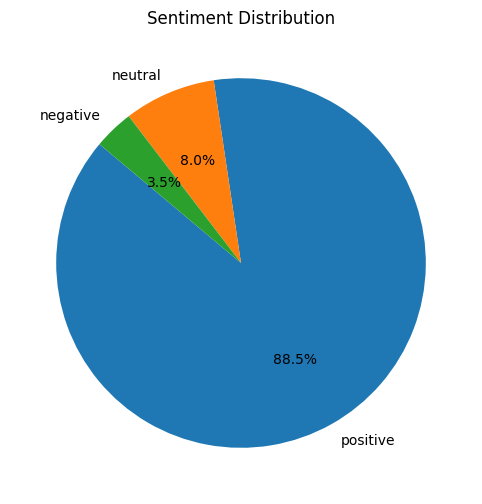

In [3]:
sentiment_counts = reviews_df['sentiment'].value_counts()

plt.figure(figsize=(8, 6))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Sentiment Distribution')
plt.show()

### **Categorizing Negative Reviews**

In [4]:
categories = {
    "cleanliness": ["clean", "dirty", "sanitary", "messy", "filthy", "unhygienic"],
    "service": ["service", "staff", "helpful", "unfriendly", "rude", "reception", "wait", "delay"],
    "amenities": ["wifi", "amenities", "pool", "gym", "facilities", "air conditioning", "ac", "tv", "television"],
    "food": ["food", "breakfast", "dinner", "meal", "cuisine", "restaurant", "eat", "drink", "bar"],
    "comfort": ["bed", "comfortable", "spacious", "noise", "quiet", "sleep", "noisy", "uncomfortable", "size"]
}

def analyze_negative_reviews(text):
    category_matches = Counter()
    for category, keywords in categories.items():
        if any(keyword in text for keyword in keywords):
            category_matches[category] += 1
    return category_matches

negative_reviews = reviews_df[reviews_df['sentiment'] == 'negative']['text']
category_counts = Counter()
for review in negative_reviews:
    category_counts.update(analyze_negative_reviews(review))

category_counts

Counter({'service': 18,
         'comfort': 6,
         'amenities': 14,
         'food': 5,
         'cleanliness': 9})

### **Plotting Bar Graph**

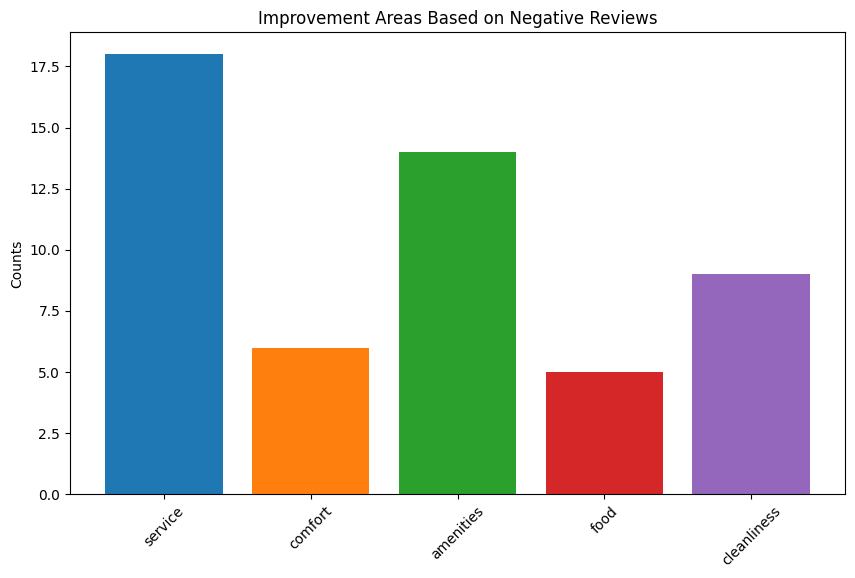

In [5]:
plt.figure(figsize=(10, 6))


categories_list = list(category_counts.keys())
counts_list = list(category_counts.values())
plt.bar(categories_list, counts_list, color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd'])
plt.title('Improvement Areas Based on Negative Reviews')
plt.xticks(rotation=45)
plt.ylabel('Counts')
plt.show()

### **Feedback**

In [6]:
def generate_improvement_feedback(category_counts):
    feedback_messages = []
    for category, count in category_counts.items():
        if category == "cleanliness":
            feedback_messages.append(f"Cleanliness was mentioned negatively in {count} reviews. Improving cleaning protocols and ensuring rooms and public areas are spotless can significantly enhance guest experience.")
        elif category == "service":
            feedback_messages.append(f"Service issues were highlighted in {count} reviews. Providing additional training to staff and ensuring prompt, friendly service can greatly improve guest satisfaction.")
        elif category == "amenities":
            feedback_messages.append(f"Amenities were criticized in {count} reviews. Reviewing and upgrading amenities like the pool, gym, and WiFi can make stays more enjoyable for guests.")
        elif category == "food":
            feedback_messages.append(f"Food quality or variety was a concern in {count} reviews. Enhancing the dining experience with better quality ingredients or more varied menu options can attract more guests.")
        elif category == "comfort":
            feedback_messages.append(f"Comfort was mentioned negatively in {count} review. Ensuring that rooms offer a peaceful, comfortable environment can improve sleep quality and overall satisfaction.")

    return "\n\n".join(feedback_messages)

tailored_feedback = generate_improvement_feedback(category_counts)
print(tailored_feedback)

Service issues were highlighted in 18 reviews. Providing additional training to staff and ensuring prompt, friendly service can greatly improve guest satisfaction.

Comfort was mentioned negatively in 6 review. Ensuring that rooms offer a peaceful, comfortable environment can improve sleep quality and overall satisfaction.

Amenities were criticized in 14 reviews. Reviewing and upgrading amenities like the pool, gym, and WiFi can make stays more enjoyable for guests.

Food quality or variety was a concern in 5 reviews. Enhancing the dining experience with better quality ingredients or more varied menu options can attract more guests.

Cleanliness was mentioned negatively in 9 reviews. Improving cleaning protocols and ensuring rooms and public areas are spotless can significantly enhance guest experience.
